In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential 
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense 
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import os

Using TensorFlow backend.


In [2]:
# Initialize CNN
model = Sequential()

# building model
model.add(Convolution2D(64, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
# pooling
model.add(MaxPooling2D(pool_size = (2,2)))

# adding a second convol layer
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flattening
model.add(Flatten())

# Full connection
model.add(Dense(units=128, activation='relu'))
# output layer
model.add(Dense(units=3, activation='softmax'))

# compile
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

/home/sachin_sharma/.conda/envs/tf18/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """
/home/sachin_sharma/.conda/envs/tf18/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.


In [3]:
# Fitting the CNN to the images(Image Augmentation, Image Preprocessing)
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(  
        rescale=1./255,
        shear_range=0.2,             
        zoom_range=0.2,              
        horizontal_flip=True)


In [4]:
# normalizing
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# This section will create Training set( Training_Set:TestSet ratio 80:20)
# path to data
os.chdir('/home/sachin_sharma/Desktop/exp_2_jpg')
training_set = train_datagen.flow_from_directory(
        'TrainingSet', 
        target_size=(64, 64),   
        batch_size=32,          
        class_mode='categorical') 

# This section will create the Test set
test_set = test_datagen.flow_from_directory( 
        'TestSet',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical', 
        shuffle=False)

Found 22528 images belonging to 3 classes.
Found 6460 images belonging to 3 classes.


In [6]:
history = model.fit_generator(training_set, 
                        steps_per_epoch=(training_set.samples/32),
                        epochs=25,
                        validation_data=test_set, 
                        validation_steps=(test_set.samples/32)) 

Epoch 1/25
704/704 [==============================] - 20s 29ms/step - loss: 0.3569 - acc: 0.8447 - val_loss: 0.2757 - val_acc: 0.8639
Epoch 2/25
704/704 [==============================] - 19s 27ms/step - loss: 0.2426 - acc: 0.8873 - val_loss: 0.1977 - val_acc: 0.8933
Epoch 3/25
704/704 [==============================] - 19s 27ms/step - loss: 0.2004 - acc: 0.9038 - val_loss: 0.1785 - val_acc: 0.9037
Epoch 4/25
704/704 [==============================] - 19s 28ms/step - loss: 0.1805 - acc: 0.9150 - val_loss: 0.1885 - val_acc: 0.8969
Epoch 5/25
704/704 [==============================] - 19s 27ms/step - loss: 0.1589 - acc: 0.9206 - val_loss: 0.1672 - val_acc: 0.9124
Epoch 6/25
704/704 [==============================] - 19s 27ms/step - loss: 0.1489 - acc: 0.9259 - val_loss: 0.1668 - val_acc: 0.9070
Epoch 7/25
704/704 [==============================] - 19s 27ms/step - loss: 0.1473 - acc: 0.9258 - val_loss: 0.1485 - val_acc: 0.9115
Epoch 8/25
704/704 [==============================] - 19s 27ms

In [7]:
# Visualizing the mapping between labels
training_set.class_indices

{'Else': 0, 'Industrial': 1, 'Residential': 2}

In [9]:
# Confusion Matrix and Classification report
Y_pred = model.predict_generator(test_set, test_set.samples//32 +1 )
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_set.classes, y_pred)
#visulaizing
def cm2df(cm, labels):
    df = pd.DataFrame()
    # rows
    for i, row_label in enumerate(labels):
        rowdata={}
        # columns
        for j, col_label in enumerate(labels): 
            rowdata[col_label]=cm[i,j]
        df = df.append(pd.DataFrame.from_dict({row_label:rowdata}, orient='index'))
    return df[labels]

#calling
df = cm2df(cm, ["Else", "Industrial", "Residential"])
print(df)

Confusion Matrix
             Else  Industrial  Residential
Else         4727          30           43
Industrial     10         706           44
Residential    11         409          480


In [13]:
# Classification Report
print('Classification Report')
target_names = ['Else','Industrial','Residential']
classificn_report = classification_report(test_set.classes, y_pred, target_names=target_names)
print(classificn_report)



Classification Report
              precision    recall  f1-score   support

        Else       1.00      0.98      0.99      4800
  Industrial       0.62      0.93      0.74       760
 Residential       0.85      0.53      0.65       900

   micro avg       0.92      0.92      0.92      6460
   macro avg       0.82      0.82      0.80      6460
weighted avg       0.93      0.92      0.91      6460



dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


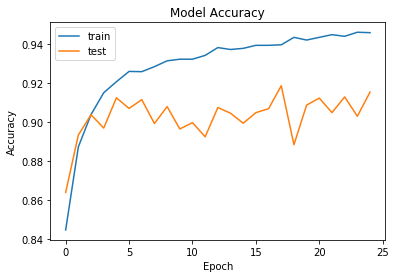

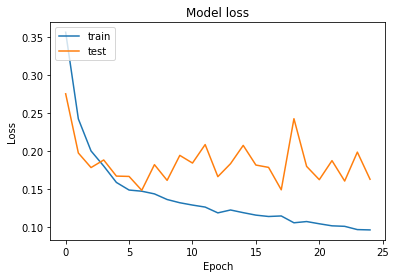

In [14]:
# Plotting the Loss and Classification Accuracy
model.metrics_names
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()